In [1]:
import numpy as np

import pandas as pd

from zipline import run_algorithm
from zipline.api import order_target_percent, symbol, schedule_function,date_rules, time_rules, \
set_benchmark, set_long_only, record
from datetime import datetime
import pyfolio as pf

from sklearn.preprocessing import MinMaxScaler

import talib

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import numpy as np
import time


def _mean_squared_error(y, pred):
    return 0.5 * np.mean((y - pred) ** 2)


def _mean_abs_error(y, pred):
    return np.mean(np.abs(y, pred))


def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def _tanh(x):
    return np.tanh(x)

def _fourier(x):
    return np.sin(x)


def _hardlimit(x):
    return (x >= 0).astype(int)


def _identity(x):
    return x


def getActivation(name):
    return {
        'sigmoid': _sigmoid,
        'fourier': _fourier,
        'hardlimit': _hardlimit,
        'tanh': _tanh
    }[name]


def getLoss(name):
    return {
        'mse': _mean_squared_error,
        'mae': _mean_abs_error
    }[name]


class ELM:
    def __init__(self, num_input_nodes, num_hidden_units, num_out_units, activation='sigmoid',
                 loss='mse', beta_init=None, w_init=None, bias_init=None):
        self._num_input_nodes = num_input_nodes
        self._num_hidden_units = num_hidden_units
        self._num_out_units = num_out_units

        self._activation = getActivation(activation)
        self._loss = getLoss(loss)

        if isinstance(beta_init, np.ndarray):
            self._beta = beta_init
        else:
            self._beta = np.random.uniform(-1., 1., size=(self._num_hidden_units, self._num_out_units))

        if isinstance(w_init, np.ndarray):
            self._w = w_init
        else:
            self._w = np.random.uniform(-1, 1, size=(self._num_input_nodes, self._num_hidden_units))

        if isinstance(bias_init, np.ndarray):
            self._bias = bias_init
        else:
            self._bias = np.zeros(shape=(self._num_hidden_units,))

        print('Bias shape:', self._bias.shape)
        print('W shape:', self._w.shape)
        print('Beta shape:', self._beta.shape)

    def fit(self, X, Y, display_time=False):
        H = self._activation(X.dot(self._w) + self._bias)

        # Moore–Penrose pseudo inverse
        if display_time:
            start = time.time()
        H_pinv = np.linalg.pinv(H)
        if display_time:
            stop = time.time()
            print(f'Train time: {stop-start}')

        self._beta = H_pinv.dot(Y)

        # print('Fit Beta shape:', self._beta.shape)

    def __call__(self, X):
        H = self._activation(X.dot(self._w) + self._bias)
        return H.dot(self._beta)

    def evaluate(self, X, Y):
        pred = self(X)

        # Loss (base on model setting)
        loss = self._loss(Y, pred)

        # Accuracy
        acc = np.sum(np.argmax(pred, axis=-1) == np.argmax(Y, axis=-1)) / len(Y)

        # Unweighted Average Recall
        # TODO

        return loss, acc

In [4]:
import pickle

model = pickle.load(open("ELM.pickle", "rb", -1))

scaler = pickle.load(open('sclar.pickle', 'rb', -1))

/home/usmanr/.virtualenvs/tf2.0/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
X_test = np.array([[1,1,1,1,1,1,1], [0,0,0,0,0,0,0]])

model.__call__(X_test)

array([-1.38117236, -0.08449991])

In [6]:
scaler.transform(X_test)

array([[2.05871197e-05, 3.43387882e-01, 4.24477648e-01, 1.00000000e-02,
        1.00000000e-02, 1.00000000e-02, 1.01000000e+00],
       [2.03302688e-05, 3.43386948e-01, 4.24476456e-01, 6.08698277e-15,
        9.24100302e-15, 0.00000000e+00, 1.00000000e+00]])

In [7]:
from os import listdir
from os.path import isfile, join

mypath = '/home/usmanr/workspace/yf_experiments/daily'

onlyfiles = [f[:-4] for f in listdir(mypath) if isfile(join(mypath, f))]

In [8]:
len(onlyfiles)

620

In [9]:
onlyfiles

['O',
 'PPL',
 'ASH',
 'UIS',
 'SANM',
 'BLL',
 'MTG',
 'CINF',
 'SDS',
 'SUB',
 'WOR',
 'VFC',
 'NSC',
 'USB',
 'VRTX',
 'IT',
 'CHTR',
 'UHS',
 'ENDP',
 'DHI',
 'CHA',
 'ENS',
 'ECH',
 'SCHW',
 'RCL',
 'UST',
 'FANG',
 'PXD',
 'HST',
 'HSY',
 'WBA',
 'RRC',
 'EOG',
 'KHC',
 'OMC',
 'DTE',
 'WLL',
 'DDS',
 'CPB',
 'INFO',
 'BCO',
 'GLW',
 'EW',
 'HCA',
 'APH',
 'VZ',
 'AAP',
 'ALL',
 'BC',
 'ADP',
 'NTRS',
 'MPC',
 'VRTS',
 'MNK',
 'IPG',
 'TDG',
 'VO',
 'FHN',
 'BFO',
 'MGM',
 'DXC',
 'AR',
 'UCC',
 'PTC',
 'AL',
 'HFC',
 'ALXN',
 'VAR',
 'GD',
 'NWSA',
 'TXT',
 'AWK',
 'CHRS',
 'LNC',
 'CVX',
 'LEG',
 'ZBH',
 'AAPL',
 'SPG',
 'SPGI',
 'KMI',
 'RJF',
 'BDX',
 'BIG',
 'HD',
 'AMZN',
 'PHB',
 'AIT',
 'PSA',
 'CERN',
 'ABBV',
 'ADSK',
 'PCAR',
 'DGX',
 'STZ',
 'CF',
 'FRT',
 'PGR',
 'TRV',
 'COTY',
 'FCPT',
 'KBH',
 'WHR',
 'APD',
 'GNT',
 'ULTA',
 'GTE',
 'ILMN',
 'JWN',
 'UAL',
 'CSCO',
 'CBB',
 'BK',
 'EBAY',
 'T',
 'SJM',
 'D',
 'VRSK',
 'LUV',
 'CI',
 'SHW',
 'FTI',
 'IBM',
 'JCI',

In [151]:
def initialize(context):
    dji = onlyfiles
    
    context.universe = [symbol(s) for s in dji]

    context.i = 0
    
    context.stocks_to_hold = 5
    
    context.holding_stocks = 0
    
    context.backwindow = 40
    
    context.predictions = {}
    
    # stop loss
    context.stop_pct = 0.9
    context.stop_loss = {}
    
#     set_long_only(True)
    
    set_benchmark(False)
    
    schedule_function(rebalance, date_rules.every_day(), time_rules.market_close())

In [152]:
def getStopLoss(context, hist):
    # remove keys no longer in portfolio
    context.stop_loss = { k : v for k,v in context.stop_loss.items() if k not in context.portfolio.positions}
    
    # get stop loss for stocks in portfolio
    for sec in context.portfolio.positions:
        if sec not in list(context.stop_loss.keys()):
            context.stop_loss[sec] = hist[sec][-1] * context.stop_pct
        else:
            context.stop_loss[sec] = max(hist[sec][-1] * context.stop_pct, context.stop_loss[sec])
                    
def rebalance(context, data):
    
#     print(context.stop_loss)
    
    # Get daily close prices for the last backwindow days
    hist = data.history(context.universe, 'close', context.backwindow, '1d')
        
    high = data.history(context.universe, 'high', context.backwindow, '1d')
    
    low = data.history(context.universe, 'low', context.backwindow, '1d')
    
    col = hist.columns
    
    for c in col:
        rsi = talib.RSI(hist[c].values, 14)
        sma_15 = talib.SMA(hist[c].values, timeperiod=15)
        macd, signal, _ = talib.MACD(hist[c].values, fastperiod=12, slowperiod=26, signalperiod=9)
        
        slowk, slowd =  talib.STOCH(high[c].values, low[c].values, hist[c].values, 
                                    5, 3, 0, 3, 0)
        
        willr = talib.WILLR(high[c].values, low[c].values, hist[c].values)
        
        X_test = np.array([[sma_15[-1], macd[-1], signal[-1], slowk[-1], slowd[-1], rsi[-1], willr[-1]]])
        
        X_test = scaler.transform(X_test)
        
        pred = model.__call__(X_test)
        
        context.predictions[c] = [pred]
        
    # update stop loss
    getStopLoss(context, hist)
     # Close positions that are no longer desirable.
    for sym in context.portfolio.positions:
        if (context.predictions[sym][0] > 0.7 or hist[sym][-1] < context.stop_loss[sym]) \
        and data.can_trade(sym):
            order_target_percent(sym, 0.0)
            context.holding_stocks -= 1
    
    df = pd.DataFrame.from_dict(context.predictions)
    
    df = df.transpose()
    
    df.sort_values(by=[0], ascending=True, inplace=True)
    
#     limit = 5
#     l = len(df[df[0] < 0.1])
#     if (l > 0 and l <= limit):
#         weight = 1/l
#     else:
    weight = 1/context.stocks_to_hold
    
    for sym in df[df[0] < 0.1][:context.stocks_to_hold].index:
        if sym not in context.portfolio.positions and data.can_trade(sym) and \
        context.holding_stocks < context.stocks_to_hold:
            order_target_percent(sym, weight)
            context.holding_stocks += 1
#     print(context.holding_stocks)
#     print(context.portfolio.positions)

In [153]:
start_date = pd.Timestamp('2020-1-1', tz='utc')
end_date = pd.Timestamp('2020-8-7', tz='utc')

result = run_algorithm(start=start_date, end=end_date, 
                      initialize=initialize,
                      capital_base=10000, 
                      data_frequency='daily', 
                      bundle='sp500')

/home/usmanr/.virtualenvs/tf2.0/lib/python3.6/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/home/usmanr/.virtualenvs/tf2.0/lib/python3.6/site-packages/empyrical/stats.py:711: RuntimeWarning: invalid value encountered in true_divide
  out=out,


In [154]:
result.head()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,excess_return,gross_leverage,long_exposure,long_value,longs_count,max_drawdown,max_leverage,net_leverage,orders,period_close,period_label,period_open,pnl,portfolio_value,positions,returns,sharpe,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2020-01-02 21:00:00+00:00,NaN,0.000000,NaN,0.067308,NaN,NaN,0.00000,10000.00000,0.00,0.00,0.0,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2020-01-02 21:00:00+00:00,2020-01,2020-01-02 14:31:00+00:00,0.00000,10000.00000,[],0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.00,0.00,1,[],0.0
2020-01-03 21:00:00+00:00,0.000000,0.000000,0.000000,0.051282,0.924070,0.000000,0.00000,10000.00000,0.00,0.00,0.0,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,"[{'id': '610805c91be049d48f6e0b8de872c9c4', 'd...",2020-01-03 21:00:00+00:00,2020-01,2020-01-03 14:31:00+00:00,0.00000,10000.00000,[],0.000000,NaN,0.0,0.0,0,NaN,10000.00000,0.00,0.00,2,[],0.0
2020-01-06 21:00:00+00:00,0.004648,-0.000507,-0.050961,0.054487,0.686853,0.002086,-7910.81187,2089.18813,7905.74,7905.74,0.0,0.790975,7905.74,7905.74,4,-0.000507,0.790975,0.790975,"[{'id': '610805c91be049d48f6e0b8de872c9c4', 'd...",2020-01-06 21:00:00+00:00,2020-01,2020-01-06 14:31:00+00:00,-5.07187,9994.92813,"[{'sid': Equity(616 [YRCW]), 'amount': 778, 'c...",-0.000507,-9.165151,0.0,0.0,0,-9.165151,10000.00000,0.00,0.00,3,"[{'amount': 778, 'dt': 2020-01-06 21:00:00+00:...",0.0
2020-01-07 21:00:00+00:00,0.018958,0.001663,0.023021,0.102564,0.600778,0.012906,0.00000,2089.18813,7927.44,7927.44,0.0,0.791428,7927.44,7927.44,4,-0.000507,0.791428,0.791428,[],2020-01-07 21:00:00+00:00,2020-01,2020-01-07 14:31:00+00:00,21.70000,10016.62813,"[{'sid': Equity(616 [YRCW]), 'amount': 778, 'c...",0.002171,5.529330,0.0,0.0,0,26.039526,2089.18813,7905.74,7905.74,4,[],0.0
2020-01-08 21:00:00+00:00,0.088331,-0.010166,-0.577074,0.089744,0.582394,0.077262,0.00000,2089.18813,7809.15,7809.15,0.0,0.788935,7809.15,7809.15,4,-0.011809,0.791428,0.788935,"[{'id': 'c0dd243479cf4b039dd5203805d583b2', 'd...",2020-01-08 21:00:00+00:00,2020-01,2020-01-08 14:31:00+00:00,-118.29000,9898.33813,"[{'sid': Equity(616 [YRCW]), 'amount': 778, 'c...",-0.011809,-5.788828,0.0,0.0,0,-6.093403,2089.18813,7927.44,7927.44,5,[],0.0


In [155]:
for pos in result.positions:
    if len(pos) > 0:
        print(len(pos))

4
4
4
5
5
5
5
5
5
5
5
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


Start date,2020-01-02
End date,2020-08-07
Total months,7
,Backtest
Annual return,94.0%
Cumulative returns,49.1%
Annual volatility,99.4%
Sharpe ratio,1.11
Calmar ratio,2.53
Stability,0.42
Max drawdown,-37.1%


/home/usmanr/.virtualenvs/tf2.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,37.12,2020-06-08,2020-07-13,NaT,NaN
1,37.04,2020-01-16,2020-03-12,2020-04-23,71
2,23.92,2020-04-23,2020-05-15,2020-06-04,31
3,3.29,2020-01-07,2020-01-10,2020-01-14,6
4,0.47,2020-01-14,2020-01-15,2020-01-16,3


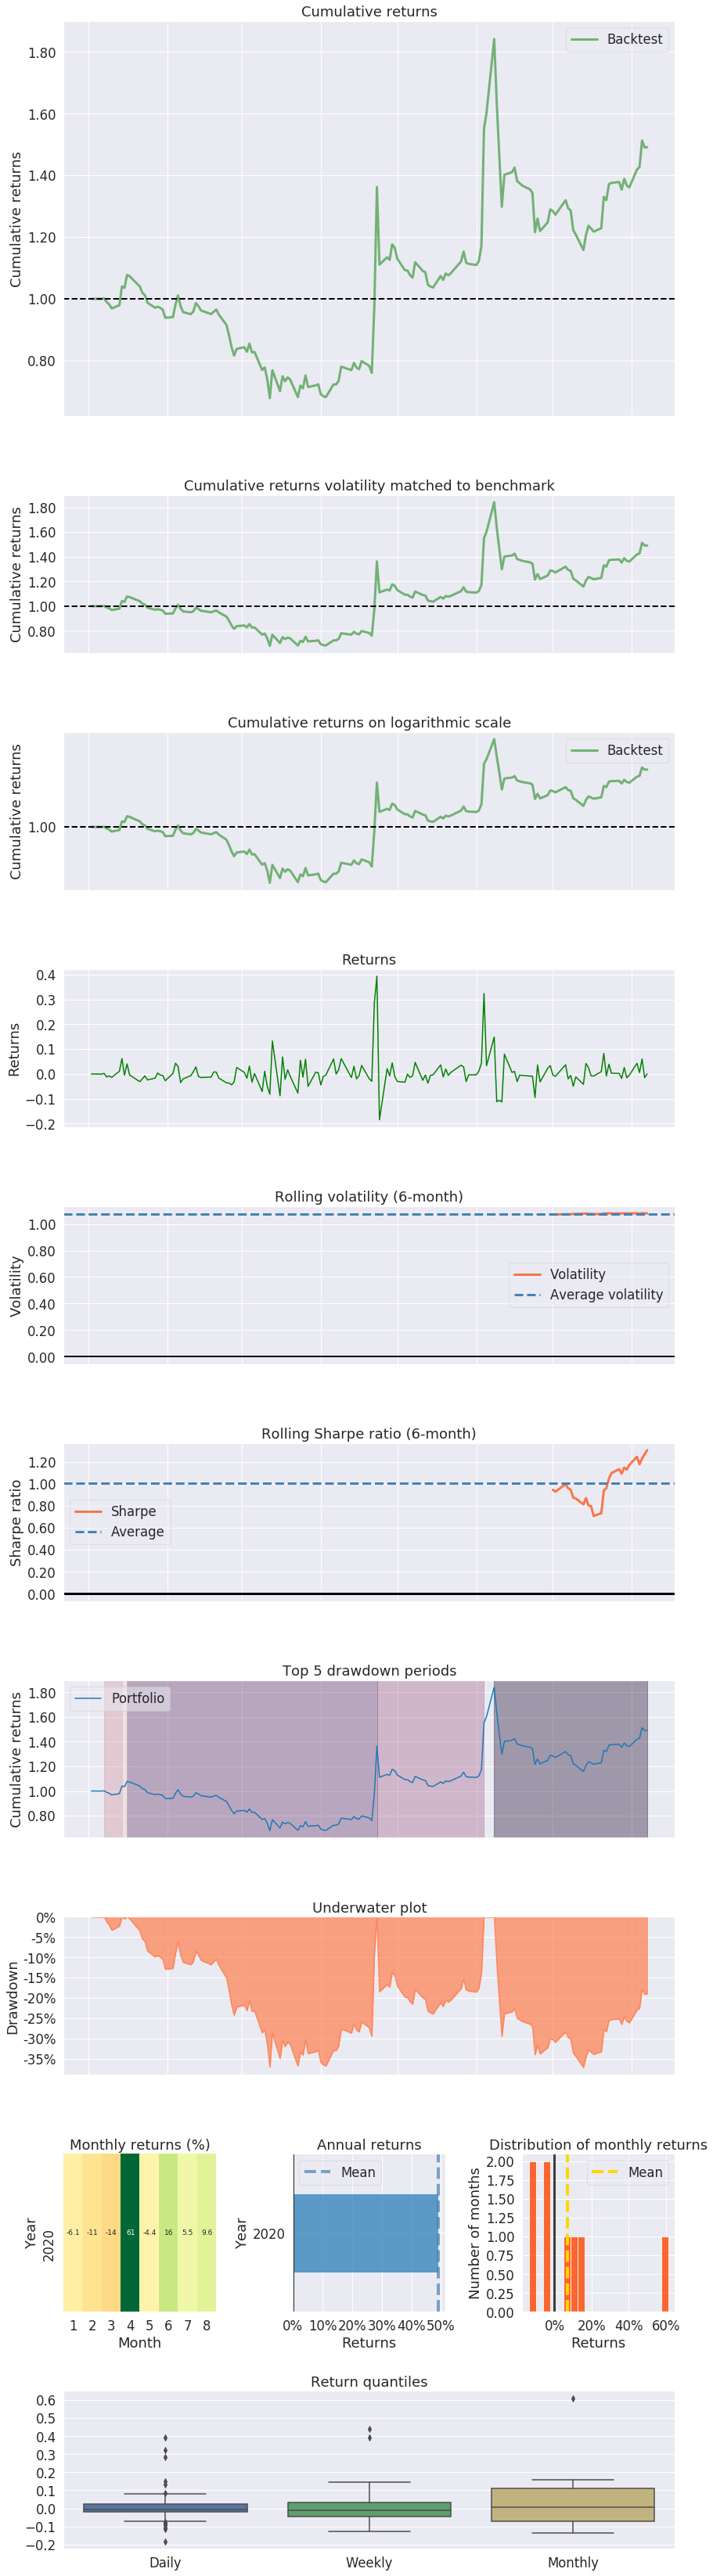

In [156]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(result)
pf.create_returns_tear_sheet(returns, benchmark_rets=None)

Top 10 long positions of all time,max
sid,
WLL,56.79%
LUB,41.56%
NBR,32.45%
INCY,30.98%
SII,30.44%
WBA,25.65%
YRCW,23.03%
BR,21.93%
ROL,21.38%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
WLL,56.79%
LUB,41.56%
NBR,32.45%
INCY,30.98%
SII,30.44%
WBA,25.65%
YRCW,23.03%
BR,21.93%
ROL,21.38%


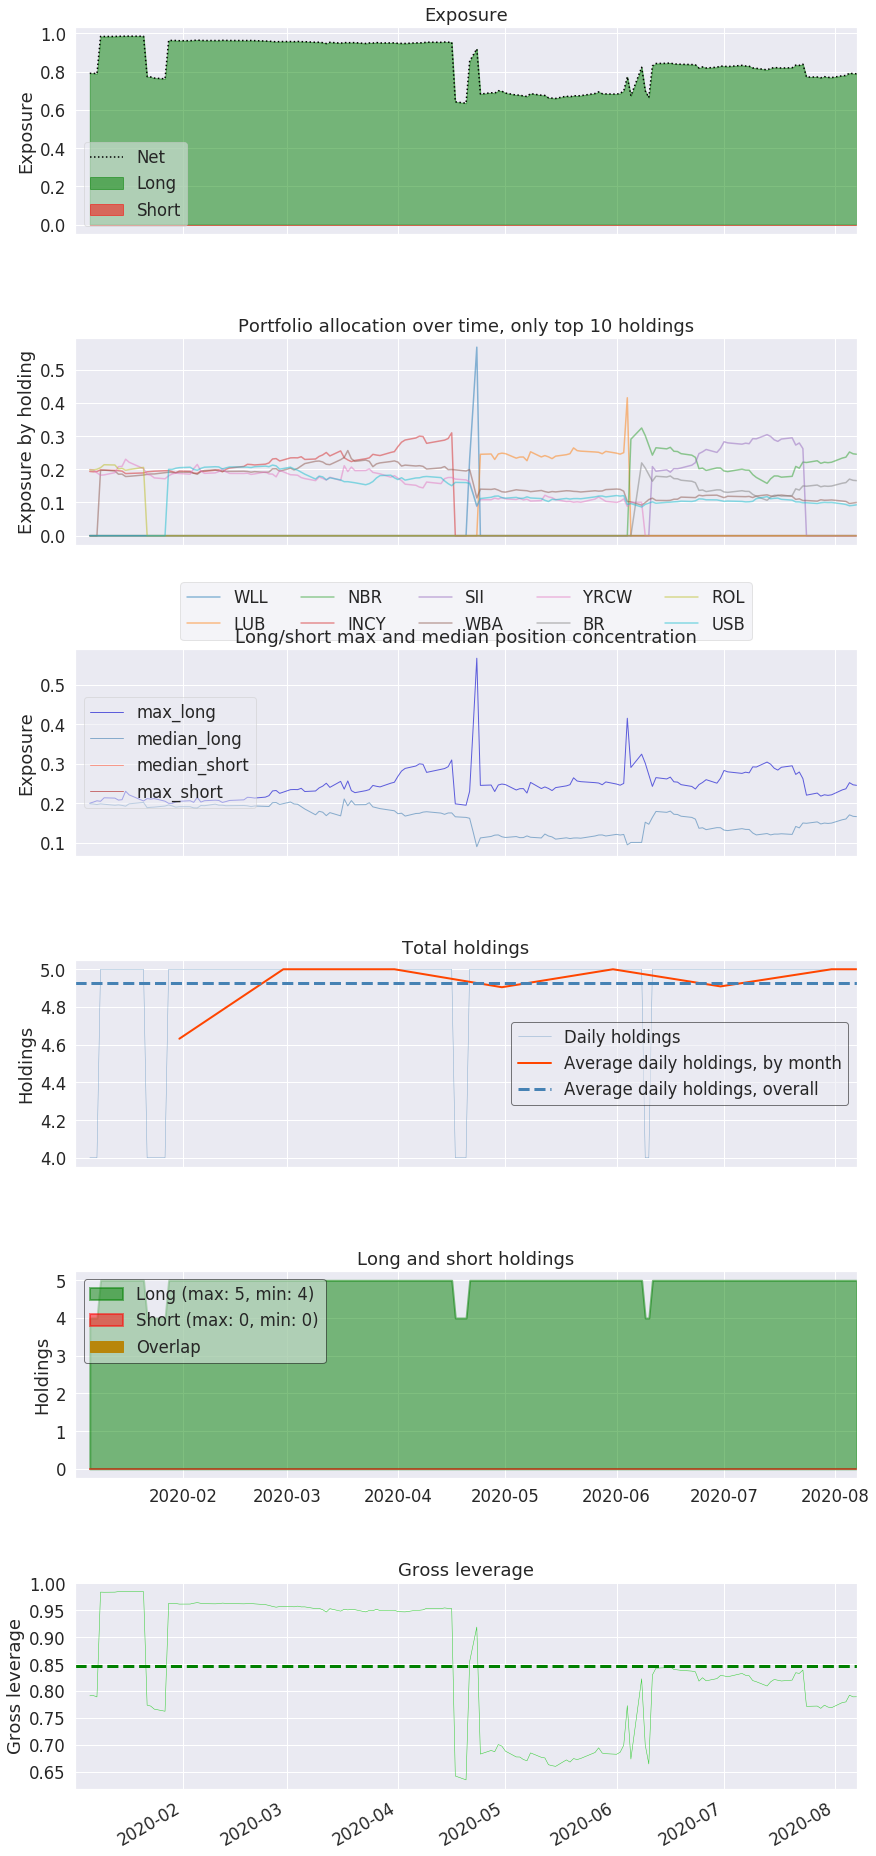

In [150]:
pf.create_position_tear_sheet(returns, positions, sector_mappings=None)

In [ ]:
x = {'a': [2], 'v': [3]}

x = pd.DataFrame.from_dict(x)

In [ ]:
x

In [ ]:
x = x.transpose()

In [ ]:
x.index

In [ ]:
x.sort_values(by=[0], ascending=False, inplace=True)

In [ ]:
x

In [ ]:
x.index